# COMP0005 - GROUP COURSEWORK 2023-24
# Gesture Recognition via Convex Hull 

In [17]:
#imports
import math
import random
import timeit
import matplotlib.pyplot as plt 

Use the cell below for all python code needed to realise the **Jarvis march algorithm** (including auxiliary data structures and functions needed by this algorithm - if any). The `jarvismarch()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points (`outputSet`) that lie on the convex hull.

In [18]:

def orientation(p1, p2, p3): # Cross product of the vectors p1p2 and p2p3. 
    return (p3[1]-p2[1])*(p2[0]-p1[0]) - (p2[1]-p1[1])*(p3[0]-p2[0])

def dist(p1, p2): #Distance between two points
    return (p2[1] - p1[1])**2 + (p2[0] - p1[0])**2

def findLeftmostPoint(inputSet):
   leftmostPoint = inputSet[0]  
   for i in range(len(inputSet)):
       if inputSet[i][1] < leftmostPoint[1] or (inputSet[i][1] == leftmostPoint[1] and inputSet[i][0] < leftmostPoint[0]):
          leftmostPoint = inputSet[i]
   return leftmostPoint

def jarvismarch(inputSet):
    left = findLeftmostPoint(inputSet)
    onHull = left
    outputSet = []
    nextPoint = None
    while nextPoint !=left:
        outputSet.append(onHull)
        nextPoint = inputSet[0] 
        for point in inputSet:
            o = orientation(onHull, nextPoint, point) 
            if nextPoint == onHull or o > 0 or (o == 0 and dist(onHull, point) > dist(onHull, nextPoint)):
                nextPoint = point
        onHull = nextPoint
    return outputSet

examplePoints =  [(random.uniform(0, 100), random.uniform(0, 100)) for _ in range(200000)]
execution_time = timeit.timeit(lambda: jarvismarch(examplePoints), number=1)
print(f"Execution time: {execution_time:.6f} seconds")


Execution time: 0.900841 seconds


Use the cell below for all python code needed to realise the **Graham scan** algorithm (including auxiliary data structures and functions needed by this algorithm - if any). The `grahamscan()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points that lie on the convex hull (`outputSet`).

In [37]:
def bubbleSort(numbers):
    """Sorts a list of numbers using the bubble sort algorithm.

    Args:
        numbers (list): The list of numbers to sort.

    Returns:
        list: The sorted list of numbers.
    """
    
    for i in range(len(numbers)):
        onePass = False
        for j in range(len(numbers)-1):
            if (numbers[j][1] > numbers[j+1][1]):
                numbers[j], numbers[j+1] = numbers[j+1], numbers[j]
                onePass = True
        if (onePass == False):
            break
    return numbers

def quickSort(numbers, lowest, highest):
    """Sorts a list of numbers using the quick sort algorithm.

    Args:
        numbers (list): The list of numbers to sort.
        lowest (int): The starting index for the sort.
        highest (int): The ending index for the sort.

    Returns:
        list: The sorted list of numbers.
    """
    if (highest <= lowest):
        return
    j = partition(numbers, lowest, highest)
    quickSort(numbers, lowest, j-1)
    quickSort(numbers,j+1,highest)
    return numbers
def partition(numbers, lowest, highest):
    """Partitions a list of numbers around a pivot, used in the quick sort algorithm.

    Args:
        numbers (list): The list of numbers to partition.
        lowest (int): The starting index for the partition.
        highest (int): The ending index for the partition.

    Returns:
        int: The index of the pivot after partitioning."""

    i = lowest
    j = highest + 1
    pivot = lowest

    while True:
        j -= 1
        i += 1
        while numbers[i][1] < numbers[pivot][1] or (numbers[i][1] == numbers[pivot][1] and numbers[i][2] < numbers[pivot][2]):
            if i == highest:
                break
            i += 1

        while numbers[j][1] > numbers[pivot][1] or (numbers[j][1] == numbers[pivot][1] and numbers[j][2] > numbers[pivot][2]):
            if j == lowest:
                break
            j -= 1

        if i >= j:
            break
        numbers[i], numbers[j] = numbers[j], numbers[i]

    numbers[pivot], numbers[j] = numbers[j], numbers[pivot]

    return j

def heapSort(numbers):
    """Sorts a list of numbers using the heap sort algorithm.

    Args:
        numbers (list): The list of numbers to sort.

    Returns:
        list: The sorted list of numbers."""
        
    endLeaf = len(numbers)
    numbers = [0] + numbers
    # Process nodes from bottom to top (ignoring child-less nodes)
    for i in range(endLeaf // 2, 0, -1):
        heapify(numbers, i, endLeaf)
    # Pop the root and maintain heap tree
    for i in range(endLeaf, 0, -1):
        numbers[i], numbers[1] = numbers[1], numbers[i]
        heapify(numbers, 1, i-1)

    return numbers[1:]
def heapify(heap, nodeIndex, leaf):
    """Transforms a list into a heap, from a given node down to a given leaf.

    Args:
        heap (list): The list to transform into a heap.
        nodeIndex (int): The index of the starting node.
        leaf (int): The index of the last leaf.
    """
    largestIndex = nodeIndex
    leftChild = 2*nodeIndex
    rightChild = 2*nodeIndex + 1
    # Sorts list in ascending order by angle, breaking ties using distance
    if leftChild <= leaf and (heap[leftChild][1] > heap[largestIndex][1] or (heap[leftChild][1] == heap[largestIndex][1] and heap[leftChild][2] > heap[largestIndex][2])):
        largestIndex = leftChild

    if rightChild <= leaf and (heap[rightChild][1] > heap[largestIndex][1] or (heap[rightChild][1] == heap[largestIndex][1] and heap[rightChild][2] > heap[largestIndex][2])):
        largestIndex = rightChild

    # If a node violates the parent-child relationship, sink with the more violating child 
    if largestIndex != nodeIndex:
        heap[nodeIndex], heap[largestIndex] = heap[largestIndex], heap[nodeIndex]
        heapify(heap, largestIndex, leaf)

def mergeSort(numbers):
    """Sorts a list of numbers using the merge sort algorithm.

    Args:
        numbers (list): The list of numbers to sort.

    Returns:
        list: The sorted list of numbers."""
        
    if (len(numbers) > 1):
        return merge(mergeSort(numbers[:len(numbers)//2]),mergeSort(numbers[len(numbers)//2:]))
    else:
        return numbers
def merge(arr1, arr2):
    """Merges two sorted lists into one sorted list.

    Parameters:
        arr1 (list): The first sorted list.
        arr2 (list): The second sorted list.

    Returns:
        list: The merged sorted list. """
        
    new_arr = []
    i = 0
    j = 0
    while i < len(arr1) and j < len(arr2):
        if arr1[i][1] < arr2[j][1] or (arr1[i][1] == arr2[j][1] and arr1[i][2] < arr2[j][2]):
            new_arr.append(arr1[i])
            i += 1
        else:
            new_arr.append(arr2[j])
            j += 1

    if i < len(arr1):
        new_arr.extend(arr1[i:])
    elif j < len(arr2):
        new_arr.extend(arr2[j:])
    return new_arr

def findLowestPoint(inputSet):
    """Finds the point with the lowest y-coordinate (and lowest x-coordinate in case of a tie) in a set of points.

    Parameters:
        inputSet (list): The list of points as tuples of x and y coordinates.

    Returns:
        tuple: The index and coordinates of the lowest point."""
        
    lowestPoint = inputSet[0]  
    lowestIndex = 0
    for i in range(len(inputSet)):
        # Choose lowest y, break ties by choosing lowest x
        if inputSet[i][1] < lowestPoint[1] or (inputSet[i][1] == lowestPoint[1] and inputSet[i][0] < lowestPoint[0]):
            lowestPoint = inputSet[i]
            lowestIndex = i
    
    return lowestIndex, lowestPoint

def turnMade(point1, point2, point3):
    """Determine the relative direction of the turn made by three points.
    The function calculates the cross product of the vectors formed by point1-point2 and point1-point3. 
    The sign of the result indicates the direction of the turn:
    - If the result is positive, the direction is counter-clockwise.
    - If the result is negative, the direction is clockwise.
    - If the result is zero, the points are collinear.

    Parameters:
    point1, point2, point3 (tuple): The points as tuples of x and y coordinates.

    Returns:
    float: The cross product of the vectors formed by point1-point2 and point1-point3."""
   
    return (point2[0] - point1[0]) * (point3[1]-point1[1]) - (point2[1]-point1[1]) * (point3[0] - point1[0])

def distance(point1, point2):
    """Calculate the Euclidean distance between two points.
    Parameters:
    point1 (tuple): The first point as a tuple of x and y coordinates.
    point2 (tuple): The second point as a tuple of x and y coordinates.

    Returns:
    float: The Euclidean distance between the two points."""
    
    return math.sqrt((point2[0] - point1[0])**2 + (point2[1] - point1[1])**2)

def polarAngle(point1, point2):
    """Calculate the polar angle between two points.
    Parameters:
    point1 (tuple): The origin point as a tuple of x and y coordinates.
    point2 (tuple): The second point as a tuple of x and y coordinates.

    Returns:
    float: The polar angle in radians."""

    return math.atan2((point2[1] - point1[1]), (point2[0] - point1[0]))


def grahamscan(inputSet, sortingAlgorithmToUse):
    """Perform the Graham scan algorithm to find the convex hull of a set of points.
    - NOTE: You can choose the sorting algorithm to use: "python" for python sort, "merge" for mergesort ect.

    Parameters:
    inputSet (list): A list of 2D points as tuples of x and y coordinates.
    sortingAlgorithmToUse (str): The sorting algorithm to use ("python", "merge", "heap", "bubble", or "quick").


    Returns:
    outputSet (list): A list of 2D points that lie on the convex hull."""
    # Finds the point with the lowest y-coordinate, breaks ties by going for lowest x-coordinate 
    lowestIndex, lowestPoint = findLowestPoint(inputSet) 
    # Swaps it with the first item in the inputSet
    inputSet[0] , inputSet[lowestIndex] = inputSet[lowestIndex] , inputSet[0]

    # Sorts the remaining points based on their polar angle with the lowestPoint (inputSet[0]),
    # Breaks ties by distance from the lowest point. 
    if sortingAlgorithmToUse == "python":
        sortedPoints = sorted(inputSet[1:], key=lambda point: polarAngle(lowestPoint, point))
    else:
        sortedPointsWithAngles = [(point, polarAngle(lowestPoint, point), distance(lowestPoint, point)) for point in inputSet[1:]]
        # Merge Sort
        if sortingAlgorithmToUse == "merge":
            sortedPointsWithAngles = mergeSort(sortedPointsWithAngles)
        # Heap Sort
        elif sortingAlgorithmToUse == "heap":
            sortedPointsWithAngles = heapSort(sortedPointsWithAngles)
        # Bubble Sort
        elif sortingAlgorithmToUse == "bubble":
            sortedPointsWithAngles = bubbleSort(sortedPointsWithAngles)
        # Quick Sort
        elif sortingAlgorithmToUse == "quick":
            sortedPointsWithAngles = quickSort(sortedPointsWithAngles, 0, len(sortedPointsWithAngles) - 1)
        sortedPoints = [point for point, angle, distance in sortedPointsWithAngles]

    convexHull = []
    # LowestPoint is first in convex hull
    convexHull.append(inputSet[0])
    # First connection to lowestPoint is second in convex hull
    convexHull.append(sortedPoints[0])

    i = 2
    previousAngleWasColinear = False
    # Sorted points processed from beginning to end
    while i < len(sortedPoints):
        # Consider the next three points in the convex hull
        lastPoint = convexHull[-1]
        lastPointBefore = convexHull[-2]
        pointConsidered = sortedPoints[i]

        turnDirection = turnMade(lastPointBefore, lastPoint, pointConsidered)
        # Counter-Clockwise of the most recent three points, so add to the hull
        if (turnDirection > 0):
            convexHull.append(pointConsidered)
            previousAngleWasColinear = False
            i += 1
        # Clockwise of the most recent three points, so pop from the hull
        elif len(convexHull) > 2 and turnDirection < 0:
            convexHull.pop()
            previousAngleWasColinear = False
        elif (turnDirection == 0):
            # If we're in a sequence of colinear points, pop the previous node because we've found another colinear point
            # Or edge case: where the third point (2nd index) in sortedPoints started a colinear sequence, so the second point (1st index) should be discarded
            if previousAngleWasColinear == True or i == 2:
                convexHull.pop()
            # Append the most recent colinear point to the convexHull
            convexHull.append(pointConsidered)
            previousAngleWasColinear = True
            i += 1
        else:
            i+=1
    outputSet = convexHull
    return outputSet

import random
import timeit

# print("Final: pythonsort: ",  grahamscan([(0,3), (4,4),(1,1), (0,0), (1,2), (3,1), (3,3), (2,2)], "python"))
# print("mergesort: ", grahamscan([(0,3), (1,1), (4,4), (2,2), (0,0), (1,2), (3,1), (3,3)], "merge"))
# print("bubblesort: ", grahamscan([(0,3), (1,1), (2,2), (4,4), (0,0), (1,2), (3,1), (3,3)], "bubble"))
# print("heapsort: ",grahamscan([(0,3), (1,1), (4,4), (2,2), (0,0), (1,2), (3,1), (3,3)], "heap"))
# print("quicksort: ",grahamscan([(0,3), (1,1), (4,4), (2,2), (0,0), (1,2), (3,1), (3,3)], "quick"))



resolution = 250000

# Input is average case (random points)
inputSet = [(random.uniform(0, 1000), random.uniform(0, 1000)) for _ in range(resolution)]
"""
### Input is the same line
slope = random.uniform(-10, 10)
intercept = random.uniform(-10, 10)
# Generate 100000 collinear points along the line
inputSet = [(x, slope * x + intercept) for x in range(resolution)]

### Input is a circle
# Choose a center and a radius for the circle
center = (random.uniform(-10, 10), random.uniform(-10, 10))
radius = random.uniform(1, 10)
# Generate 1000 points along the circumference of the circle
inputSet = [(center[0] + radius * math.cos(2 * math.pi * i / 1000), center[1] + radius * math.sin(2 * math.pi * i / 1000)) for i in range(1000)]

### Input is a Triangle
# Choose three vertices for the triangle
vertices = [(0, 0), (1, 0), (0.5, math.sqrt(3)/2)]
# Generate points along the edges of the triangle
inputSet = []
# Edge from vertices[0] to vertices[1]
for t in range(resolution):
    x = vertices[0][0] + t * (vertices[1][0] - vertices[0][0]) / resolution
    y = vertices[0][1] + t * (vertices[1][1] - vertices[0][1]) / resolution
    inputSet.append((x, y))
# Edge from vertices[1] to vertices[2]
for t in range(resolution):
    x = vertices[1][0] + t * (vertices[2][0] - vertices[1][0]) / resolution
    y = vertices[1][1] + t * (vertices[2][1] - vertices[1][1]) / resolution
    inputSet.append((x, y))
# Edge from vertices[2] to vertices[0]
for t in range(resolution):
    x = vertices[2][0] + t * (vertices[0][0] - vertices[2][0]) / resolution
    y = vertices[2][1] + t * (vertices[0][1] - vertices[2][1]) / resolution
    inputSet.append((x, y))"""


execution_time = timeit.timeit(lambda: grahamscan(inputSet, "merge"), number=1)

print(f"Execution time with Merge Sort: {execution_time:.6f} seconds")

# execution_time = timeit.timeit(lambda: grahamscan(inputSet, "bubble"), number=1)

# print(f"Execution time with Bubble Sort: {execution_time:.6f} seconds")

# execution_time = timeit.timeit(lambda: grahamscan(inputSet, "quick"), number=1)

# print(f"Execution time with Quick Sort: {execution_time:.6f} seconds")

# execution_time = timeit.timeit(lambda: grahamscan(inputSet, "heap"), number=1)

# print(f"Execution time with Heap Sort: {execution_time:.6f} seconds")



Execution time with Merge Sort: 1.085662 seconds


Use the cell below for all python code needed to realise the **Chen's** algorithm (including auxiliary data structures and functions needed by this algorithm - if any). The `chen()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points that lie on the convex hull (`outputSet`).

In [20]:


def divideSet(lst, m):
    return [lst[i:i + m] for i in range(0, len(lst), m)]

def jarvismarch4Chan(inputSet, m):
    left = findLeftmostPoint(inputSet)
    onHull = left
    outputSet = []
    nextPoint = None
    i = 0
    while nextPoint !=left:
        if i > m**2:
            return None
        outputSet.append(onHull)
        nextPoint = inputSet[0] 
        for point in inputSet:
            o = orientation(onHull, nextPoint, point) 
            if nextPoint == onHull or o > 0 or (o == 0 and dist(onHull, point) > dist(onHull, nextPoint)):
                nextPoint = point
        onHull = nextPoint
    return outputSet

def chan(inputSet):
    n = len(inputSet)
    m = 2
    while m < n:
        print(m)
        partitions = divideSet(inputSet, m)#1
        hulls = []
        for p in partitions:
            hulls += grahamscan(p, "merge")
        
        out = jarvismarch4Chan(hulls, m)
        if out is not None:
            return out
        m = m**2
    raise Exception("No hull found")

inputSet = [(0,3), (1,1), (4,4), (2,2), (0,0), (1,2), (3,1), (3,3)]
print(chan(inputSet))

2
[(0, 0), (0, 3), (4, 4), (3, 1)]


Use the cell below to implement the **synthetic data generator** needed by your experimental framework (including any auxiliary data structures and functions you might need - be mindful of code readability and reusability).

In [20]:
class TestDataGenerator():
    """
    A class to represent a synthetic data generator.

    ...

    Attributes
    ----------
    
    [to be defined as part of the coursework]

    Methods
    -------
    
    [to be defined as part of the coursework]

    """
        
    #ADD YOUR CODE HERE
    
    def __init__():
        pass


Use the cell below to implement the requested **experimental framework** API.

In [21]:
""" Experimental framework considers:
        Evaluation of each 3 individual algorithms:
            - Graham Scan:
            
                - For Graham scan this is:
                    - random data
            Jarvis March:
                    - 
            Chan's algorithm:
                    - 
            - Worst Case
        Comparison of performance for each algorithms:
            - Jarvis March is better suited when:
                - 
            - Graham Scan is better suited when:
                - 
            - Chan's Algorithm is better suited when
    """
class ExperimentalFramework():
    """
    A class to represent an experimental framework.

    ...

    Attributes
    ----------
    
    [to be defined as part of the coursework]

    Methods
    -------
    
    [to be defined as part of the coursework]

    """
        
    #ADD YOUR CODE HERE
    
    def __init__():
        pass

Use the cell below to illustrate the python code you used to **fully evaluate** the three convex hull algortihms under considerations. The code below should illustrate, for example, how you made used of the **TestDataGenerator** class to generate test data of various size and properties; how you instatiated the **ExperimentalFramework** class to  evaluate each algorithm using such data, collect information about their execution time, plots results, etc. Any results you illustrate in the companion PDF report should have been generated using the code below.

jarvis with 4000 points


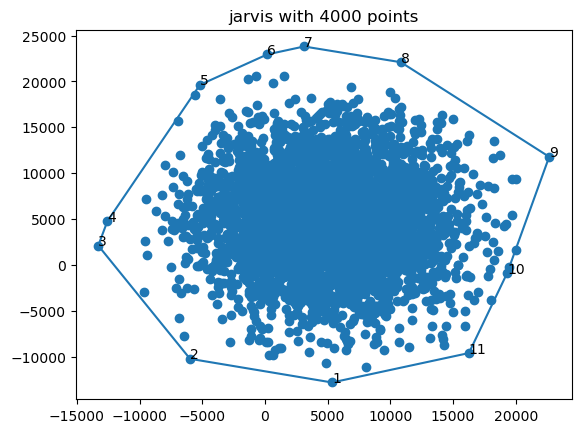

In [30]:
# ADD YOUR TEST CODE HERE 





#PLOTTING

def graph(inSet, outSet, title=""):
    plt.title(title)
    x = []
    y = []
    for i in inSet:
        x.append(i[0])
        y.append(i[1])
    plt.scatter(x, y)
    x = []
    y = []
    for i in outSet:
        x.append(i[0])
        y.append(i[1])
    x.append(outSet[0][0])
    y.append(outSet[0][1])    
    plt.plot(x, y)
    for i in range(len(outSet)):
        plt.text(x[i], y[i], f"{i+1}")   
    plt.show()


resolution = 4_000 # u can change this number

inputSet = []
for _ in range(resolution):
    x = random.gauss(5_000, 5_000)
    y= random.gauss(5_000, 5_000)
    inputSet.append((x,y))


title = f"jarvis with {resolution} points" # u can change the title
print(title)
hull = jarvismarch(inputSet) # u can change the algo

graph(inputSet, hull, title)